In [2]:
import os 

os.chdir("/home/theovincent/MVA/3DPointCloud/3DPointCloudClassification")

## Z grounds

In [4]:
import numpy as np

z_grounds = []

for path, subdirs, files in os.walk("../RangeNet++/lidar-bonnetal/train/tasks/semantic/data_kitti/sequences/"):
    for name in files:
        path_file = os.path.join(path, name)
        
        if path_file[-4:] == ".bin":
            scan = np.fromfile(path_file, dtype=np.float32)
            scan = scan.reshape((-1, 4))

            n, bins = np.histogram(scan[:, 2], bins=100)
            z_grounds.append((bins[np.argmax(n)] + bins[np.argmax(n) + 1]) / 2)

np.median(z_grounds)

-1.7033191919326782

## Max distance 

40.542442

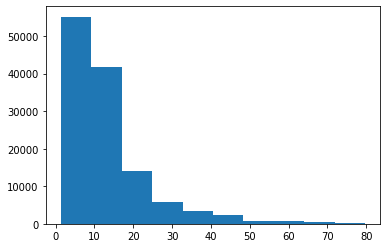

In [26]:
import matplotlib.pyplot as plt 

scan = np.fromfile("data/000000.bin", dtype=np.float32)
scan = scan.reshape((-1, 4))
            
n, bins, _ = plt.hist(np.linalg.norm(scan[:, :3], axis=1))

bins[np.nonzero(n > scan.shape[0] / 100)[0][-1]]

In [27]:
import numpy as np

max_distances = []

for path, subdirs, files in os.walk("../RangeNet++/lidar-bonnetal/train/tasks/semantic/data_kitti/sequences/"):
    for name in files:
        path_file = os.path.join(path, name)
        
        if path_file[-4:] == ".bin":
            scan = np.fromfile(path_file, dtype=np.float32)
            scan = scan.reshape((-1, 4))
            
            n, bins = np.histogram(np.linalg.norm(scan[:, :3], axis=1))
            max_distances.append(bins[np.nonzero(n > scan.shape[0] / 100)[0][-1]])

max_distance = np.median(max_distances)
max_distance

48.8722

## Max height

1.8105267


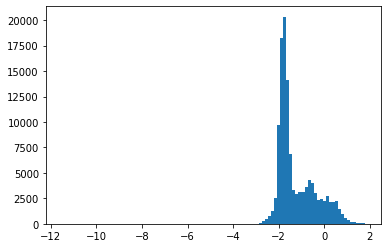

In [57]:
import matplotlib.pyplot as plt 

scan = np.fromfile("data/000000.bin", dtype=np.float32)
scan = scan.reshape((-1, 4))
scan = scan[np.linalg.norm(scan[:, :3], axis=1) < max_distance] 

n, bin, _ = plt.hist(scan[:, 2], bins=100)
print(np.max(scan[:, 2]))

In [25]:
import numpy as np

max_heights = []

for path, subdirs, files in os.walk("../RangeNet++/lidar-bonnetal/train/tasks/semantic/data_kitti/sequences/"):
    for name in files:
        path_file = os.path.join(path, name)
        
        if path_file[-4:] == ".bin":
            scan = np.fromfile(path_file, dtype=np.float32)
            scan = scan.reshape((-1, 4))
            scan = scan[np.linalg.norm(scan[:, :3], axis=1) < max_distance] 
            
            max_heights.append(np.max(scan[:, 2]))

max_height = np.median(max_heights)
max_height

NameError: name 'max_distance' is not defined

## Min distance

3.8181818181818183

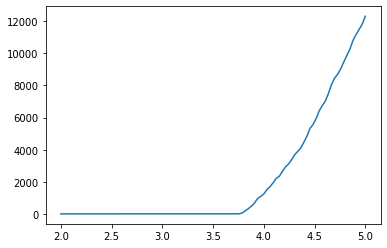

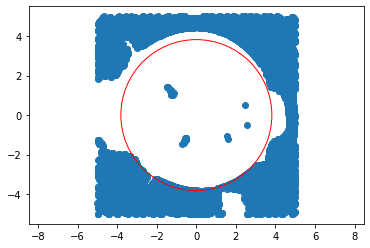

In [98]:
import matplotlib.pyplot as plt 

scan = np.fromfile("data/000000.bin", dtype=np.float32)
scan = scan.reshape((-1, 4))
scan = scan[np.logical_and(scan[:, 0] < 5, scan[:, 0] > -5)] 
scan = scan[np.logical_and(scan[:, 1] < 5, scan[:, 1] > -5)] 

radiuses = np.linspace(2, 5, num=100)
n_points_in_cercle = []
for radius in radiuses:
    n_points_in_cercle.append((scan[:, 0] ** 2 + scan[:, 1] ** 2 <= radius ** 2).sum())
plt.plot(radiuses, n_points_in_cercle)

best_radius = radiuses[np.nonzero(np.array(n_points_in_cercle) > 100)[0][0]]

fig, ax = plt.subplots()

plt.scatter(scan[:, 0], scan[:, 1])
plt.axis('equal')
_ = ax.add_patch(plt.Circle((0, 0), best_radius,color='r', fill=False))
best_radius

In [100]:
import numpy as np

min_distances = []

radiuses = np.linspace(2, 5, num=100)

for path, subdirs, files in os.walk("../RangeNet++/lidar-bonnetal/train/tasks/semantic/data_kitti/sequences/"):
    for name in files:
        path_file = os.path.join(path, name)
        
        if path_file[-4:] == ".bin":
            scan = np.fromfile(path_file, dtype=np.float32)
            scan = scan.reshape((-1, 4))
            scan = scan[np.logical_and(scan[:, 0] < 5, scan[:, 0] > -5)] 
            scan = scan[np.logical_and(scan[:, 1] < 5, scan[:, 1] > -5)] 

            n_points_in_cercle = []
            for radius in radiuses:
                n_points_in_cercle.append((scan[:, 0] ** 2 + scan[:, 1] ** 2 <= radius ** 2).sum())
            
            min_distances.append(radiuses[np.nonzero(np.array(n_points_in_cercle) > 100)[0][0]])

min_distance = np.min(min_distances)
min_distance

2.090909090909091

## Number of points

In [101]:
bins = np.logspace(np.log(min_distance) / np.log(10), np.log(max_distance) / np.log(10), 10)

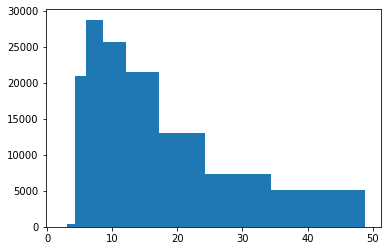

In [102]:
import matplotlib.pyplot as plt 
import numpy as np


scan = np.fromfile("data/000000.bin", dtype=np.float32)
scan = scan.reshape((-1, 4))

n, _, _ = plt.hist(np.linalg.norm(scan, axis=1), bins)

In [110]:
import numpy as np

ns = np.zeros(bins.shape[0] - 1)
n_samples = 0
n_points = []

for path, subdirs, files in os.walk("../RangeNet++/lidar-bonnetal/train/tasks/semantic/data_kitti/sequences/"):
    for name in files:
        path_file = os.path.join(path, name)
        
        if path_file[-4:] == ".bin":
            scan = np.fromfile(path_file, dtype=np.float32)
            scan = scan.reshape((-1, 4))

            n_points.append(scan.shape[0])
            n, _ = np.histogram(np.linalg.norm(scan, axis=1), bins)
            ns = np.max(np.vstack((n, ns)), axis=0)


ns = ns / ns.sum()
n_per_bin = (ns * np.median(n_points)).astype(int)
print(np.median(n_points))
n_per_bin

122260.5


array([ 6159,  6883, 20252, 24437, 16630, 15982, 14253, 10516,  7144])